In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ML - Project sem 4/datasets/train_V2.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ML - Project sem 4/datasets/score.csv')

# EDA

In [ ]:
df_train.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In [ ]:
df_test.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg
0,5660.0,4320.0,8640.0,0.0,0.0,8000.0,0.0,0.0,1.0,0.0,...,0.538419,0.396819,0.423742,0.763608,NaN,NaN,NaN,NaN,NaN,NaN
1,3990.0,9.0,3450.0,0.0,0.0,12500.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1158.0,82.0,4194.0,408.0,4.0,12000.0,0.0,0.0,0.0,1.0,...,0.009811,0.592842,NaN,NaN,0.252444,0.724693,0.818064,0.387361,NaN,NaN
3,2451.0,791.0,2119.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,946.0,222.0,2036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
We see that most column types are float which probably isn't the best data type. 
"""
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income_am         496 non-null    float64
 1   profit_last_am    496 non-null    float64
 2   profit_am         496 non-null    float64
 3   damage_am         497 non-null    float64
 4   damage_inc        496 non-null    float64
 5   crd_lim_rec       496 non-null    float64
 6   credit_use_ic     496 non-null    float64
 7   gluten_ic         496 non-null    float64
 8   lactose_ic        496 non-null    float64
 9   insurance_ic      496 non-null    float64
 10  spa_ic            498 non-null    float64
 11  empl_ic           500 non-null    float64
 12  cab_requests      495 non-null    float64
 13  married_cd        500 non-null    bool   
 14  bar_no            496 non-null    float64
 15  sport_ic          496 non-null    float64
 16  neighbor_income   479 non-null    float64
 1

In [ ]:
"""
We see that a lot of columns have 53 missing values, they might be from the same rows
"""
df_train.isnull().sum()

income_am                  53
profit_last_am             53
profit_am                  53
damage_am                  46
damage_inc                 53
crd_lim_rec                53
credit_use_ic              53
gluten_ic                  53
lactose_ic                 53
insurance_ic               53
spa_ic                     30
empl_ic                     1
cab_requests               88
married_cd                  0
bar_no                     53
sport_ic                   53
neighbor_income           239
age                        53
marketing_permit           53
urban_ic                   53
dining_ic                  88
presidential               88
client_segment             53
sect_empl                  53
prev_stay                  53
prev_all_in_stay           53
divorce                    53
fam_adult_size             53
children_no                53
tenure_mts                392
tenure_yrs                392
company_ic                 53
claims_no                  53
claims_am 

In [ ]:
"""
As expected we find 53 columns which have barely any data
"""
df_train.loc[(df_train['income_am'].isnull())& (df_train['profit_last_am'].isnull())].index

Int64Index([  90,  306,  474,  517,  670,  790,  996, 1062, 1164, 1261, 1275,
            1281, 1338, 1448, 1696, 1744, 1852, 2058, 2096, 2250, 2348, 2672,
            2696, 2734, 2917, 2956, 3068, 3198, 3213, 3326, 3377, 3494, 3793,
            3926, 3952, 3959, 3990, 4000, 4009, 4138, 4159, 4242, 4392, 4477,
            4528, 4545, 4614, 4641, 4669, 4789, 4851, 4946, 4993],
           dtype='int64')

In [ ]:
df_train.describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,...,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,...,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,...,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,...,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,...,7.474935e-01,7.449235e-01,7.464826e-01,7.452133e-01,7.493876e-01,7.512817e-01,7.357425,2223.712500,1.000000,202.612500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d9523310>,
      dtype=object)

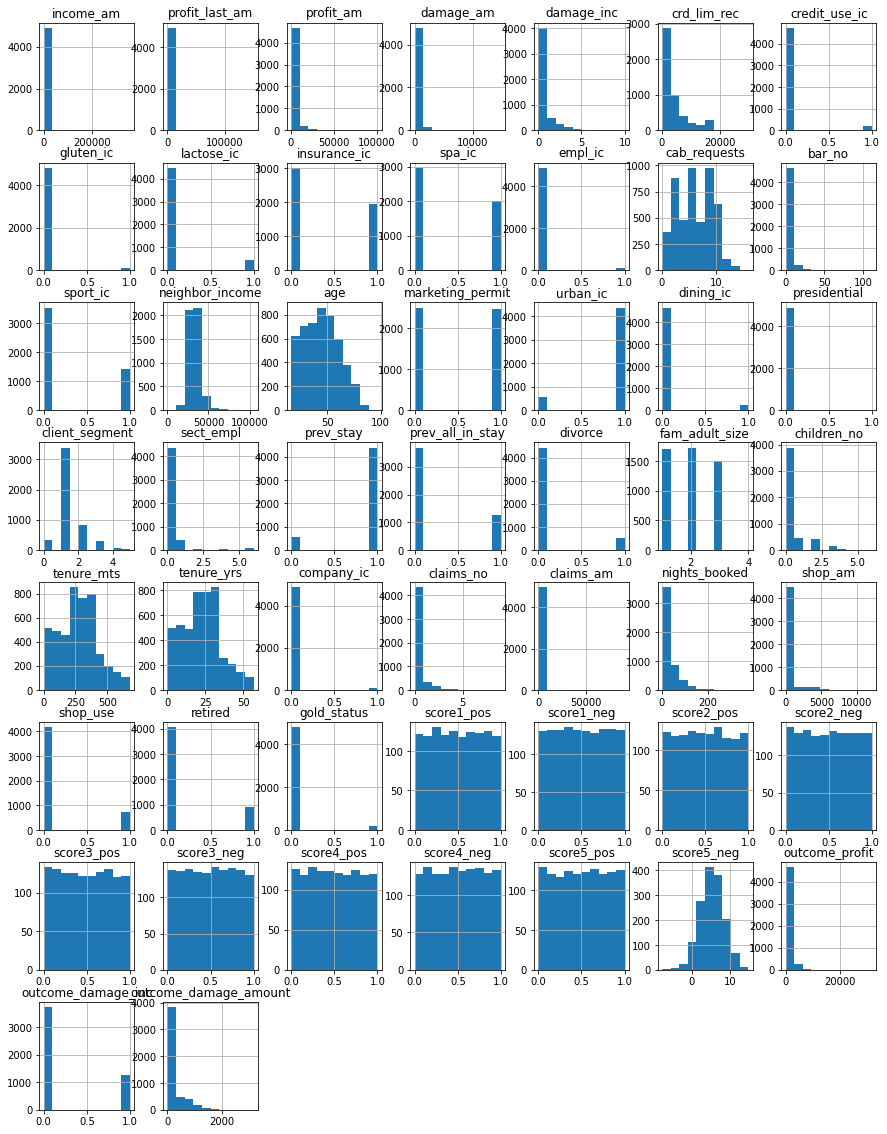

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_train.hist(ax=ax)

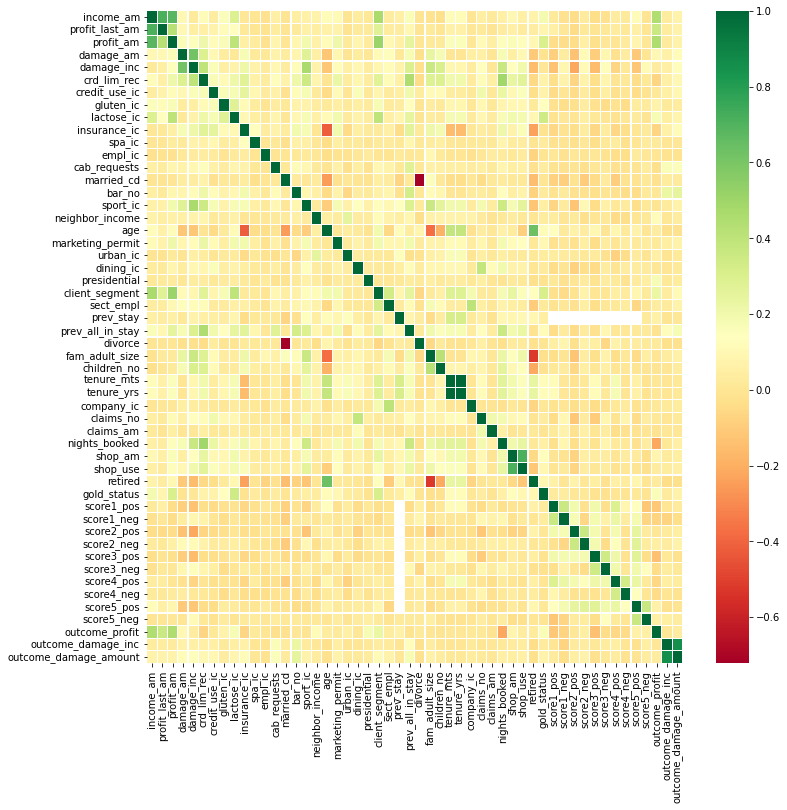

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap='RdYlGn', linewidth=0.1) 

In [ ]:
'''
We noticed that there appears to be no sector 5 in which the employers work, we assume it is plausable that there are no employes working in sector 5
'''
df_train['sect_empl'].value_counts()

0.0    4372
1.0     433
6.0      71
2.0      42
4.0      26
3.0       3
Name: sect_empl, dtype: int64

# Data cleaning

In [ ]:
train_no_dup = df_train.drop_duplicates().copy()
test_no_dup = df_test.drop_duplicates().copy()

In [ ]:
"""
Drop the 53 (almost) empty rows
"""
def drop_empty_rows(df_no_dup):
    df_no_dup.drop(index=df_no_dup.loc[(df_no_dup['income_am'].isnull())& (df_no_dup['profit_last_am'].isnull())].index.tolist(),axis=0,inplace=True)

drop_empty_rows(train_no_dup)
drop_empty_rows(test_no_dup)

In [ ]:
'''
Since we have the tenure in months the year version is redundant
'''
train_no_dup.drop("tenure_yrs",axis=1,inplace=True)
test_no_dup.drop("tenure_yrs",axis=1,inplace=True)

In [ ]:
"""
make all values absolute
Drop scores from score5_neg that are above 10 since this is an impossible value
devide the values above 1 by 10
"""
def make_scores_abs(df_no_dup):
    print(f"Shape before: {df_no_dup.loc[df_no_dup['score5_neg']<0].shape}")
    df_no_dup["score5_neg"] = df_no_dup["score5_neg"].apply(abs)
    df_no_dup.drop(index=df_no_dup.loc[(df_no_dup['score5_neg']>10)].index.tolist(),axis=0,inplace=True)
    df_no_dup['score5_neg']=df_no_dup.loc[(df_no_dup['score5_neg']>1)&(df_no_dup['score5_neg']<=10)]["score5_neg"].div(10)
    print(f"Shape after: {df_no_dup.loc[df_no_dup['score5_neg']>1].shape}")
    
make_scores_abs(train_no_dup)
make_scores_abs(test_no_dup)

Shape before: (85, 52)
Shape after: (0, 52)
Shape before: (5, 49)
Shape after: (0, 49)


In [ ]:
"""
Take avg of all score columns exluding NaN values
"""

train_no_dup["score_pos"]= 0
train_no_dup["score_neg"]= 0

test_no_dup["score_pos"]= 0
test_no_dup["score_neg"]= 0

hotels=5

def getHotelsThatGaveScore(row,posNeg):
  hotelsThatGaveScore=[];
  for i in range(1,hotels+1):
      if(pd.isna(row["score"+str(i)+"_"+posNeg])==False):
        hotelsThatGaveScore.append("score"+str(i)+"_"+posNeg);
  return hotelsThatGaveScore;

def calculateAverageScore(posNeg,df_no_dup):
  for index,row in df_no_dup.iterrows():    
    score=0;
    hotelsThatGaveScore=getHotelsThatGaveScore(row,posNeg);
    for hotel in hotelsThatGaveScore:
        score+=row[hotel]
    if(score!=0):
      df_no_dup.at[index,'score_'+posNeg]=score/len(hotelsThatGaveScore)

def avgScores(df_no_dup):
    positiveNegative = ['pos','neg']
    for posNeg in positiveNegative:
      df_no_dup['score_'+posNeg]=df_no_dup['score_'+posNeg].astype('float64');
      calculateAverageScore(posNeg,df_no_dup);

avgScores(train_no_dup)
avgScores(test_no_dup)

In [ ]:
train_no_dup.drop(['score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],axis=1,inplace=True)
test_no_dup.drop(['score1_pos','score1_neg','score2_pos','score2_neg','score3_pos','score3_neg','score4_pos','score4_neg','score5_pos','score5_neg'],axis=1,inplace=True)

In [ ]:
''' 
We still see some empty values
'''
train_no_dup.isnull().sum()

income_am                  0
profit_last_am             0
profit_am                  0
damage_am                  0
damage_inc                 0
crd_lim_rec                0
credit_use_ic              0
gluten_ic                  0
lactose_ic                 0
insurance_ic               0
spa_ic                     0
empl_ic                    0
cab_requests              34
married_cd                 0
bar_no                     0
sport_ic                   0
neighbor_income          184
age                        0
marketing_permit           0
urban_ic                   0
dining_ic                 34
presidential              34
client_segment             0
sect_empl                  0
prev_stay                  0
prev_all_in_stay           0
divorce                    0
fam_adult_size             0
children_no                0
tenure_mts               330
company_ic                 0
claims_no                  0
claims_am                  0
nights_booked              0
gender        

In [ ]:
''' 
We see that a few columns have 34 empty rows so we think that those geusts didn't use those services
'''
def fill_unused_services(df_no_dup):
    df_no_dup.loc[(df_no_dup['shop_am'] == 0.0) & (df_no_dup['shop_use'].isnull())] = df_no_dup.loc[(df_no_dup['shop_am'] == 0.0) & (df_no_dup['shop_use'].isnull())].fillna('0')
    
fill_unused_services(train_no_dup)
fill_unused_services(test_no_dup)

In [ ]:
''' 
Impute the mean value where the actual value is NaN in the neighbor_income column
'''
from sklearn.impute import SimpleImputer

def impute_neighbur_income(df_no_dup):
    mean_imputer = SimpleImputer(missing_values= np.nan,strategy='mean')
    mean_imputer.fit(np.array(df_no_dup['neighbor_income']).reshape(-1,1))
    df_no_dup['neighbor_income'] = mean_imputer.transform(np.array(df_no_dup['neighbor_income']).reshape(-1,1))
    
impute_neighbur_income(train_no_dup)
impute_neighbur_income(test_no_dup)

train_no_dup['neighbor_income'].isnull().sum()

0

In [ ]:
'''
We noticed that there are rows where the guests used the shop (shop_use=0) but with 0 amount spend in the shop
'''
from sklearn.impute import SimpleImputer

def imupte_shop_am(df_no_dup):
    mean_imputer = SimpleImputer(missing_values= 0,strategy='mean')
    mean_imputer.fit(np.array(df_no_dup['shop_am']).reshape(-1,1))
    df_no_dup['shop_am'] = mean_imputer.transform(np.array(df_no_dup['shop_am']).reshape(-1,1))

    df_no_dup['shop_am'].isnull().sum()

    df_no_dup.loc[
          df_no_dup.loc[(df_no_dup['shop_am']>0)&(df_no_dup['shop_use']==0)].index.tolist()
        ,['shop_am']] = 0
    
imupte_shop_am(train_no_dup)
imupte_shop_am(test_no_dup)

In [ ]:
'''
Standardize nights booked
'''
def standardize_night_booked(df_no_dup):
    df_no_dup[(df_no_dup['nights_booked'] < 30) & (df_no_dup['tenure_mts'].isnull()) ] = df_no_dup[(df_no_dup['nights_booked'] < 30) & (df_no_dup['tenure_mts'].isnull()) ].fillna(0)
    
standardize_night_booked(train_no_dup)
standardize_night_booked(test_no_dup)

In [ ]:
"""
Change bool to int
"""
train_no_dup['married_cd'] = train_no_dup['married_cd'].astype('int8')
test_no_dup['married_cd'] = test_no_dup['married_cd'].astype('int8')

In [ ]:
"""
Binary one hot encode the gender column 
"""
def encode_gender(df_no_dup):
    df_no_dup['gender'].replace(['V','M'],[0,1],inplace=True)
    df_no_dup['gender'].astype('int8')
    
encode_gender(train_no_dup)
encode_gender(test_no_dup)

In [ ]:
""" 
Change the column types to the best fitting data type.
"""
cols = list(train_no_dup.drop(['income_am','profit_am','damage_am','damage_inc','outcome_profit','outcome_damage_inc','outcome_damage_amount','gender'],1).keys())

def check_float_or_object(df_no_dup):
    cols_to_int = []
    for col in cols:
      if df_no_dup[col].dtype == 'float64' or df_no_dup[col].dtype == 'object':
        df_no_dup[col] = df_no_dup[col].astype('float64')
        if df_no_dup[col].apply(float.is_integer).all():
          cols_to_int.append(col)
    return cols_to_int

cols_to_int_train = check_float_or_object(train_no_dup)
cols_to_int_test = check_float_or_object(test_no_dup)

def cast_to_fitting_int(col,df):
  if df[col].max() <= 1:
    return df[col].astype('int8')
  return df[col].astype('int16')

def apply_casting(df_no_dup,cols_to_int):
    for col in cols_to_int:
      df_no_dup[col] = cast_to_fitting_int(col,df_no_dup)

apply_casting(train_no_dup,cols_to_int_train)
apply_casting(test_no_dup,cols_to_int_test)

train_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4851 non-null   float64
 1   profit_last_am         4851 non-null   float64
 2   profit_am              4851 non-null   float64
 3   damage_am              4851 non-null   float64
 4   damage_inc             4851 non-null   float64
 5   crd_lim_rec            4851 non-null   int16  
 6   credit_use_ic          4851 non-null   int8   
 7   gluten_ic              4851 non-null   int8   
 8   lactose_ic             4851 non-null   int8   
 9   insurance_ic           4851 non-null   int8   
 10  spa_ic                 4851 non-null   int8   
 11  empl_ic                4851 non-null   int8   
 12  cab_requests           4851 non-null   int16  
 13  married_cd             4851 non-null   int8   
 14  bar_no                 4851 non-null   int16  
 15  spor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
"""
Log transforming all columns with a skew greater than 0.75
"""
from scipy.stats import skew

def apply_skew(df_no_dup):
    df_no_skew = df_no_dup.copy()
    df_no_skew = df_no_skew.dropna()

    num_feat = df_no_skew.select_dtypes(include=['int16','int64', 'float64']).columns
    try:
        num_feat = num_feat.drop(['outcome_damage_inc'], 1) # to avoid problems with this boolean
    except:
        pass
    

    skewed = df_no_skew[num_feat].apply(lambda x: skew(x.dropna().astype(float), nan_policy='omit'))
    skewed = skewed[skewed > 0.75]
    skewed = skewed.index
    df_no_skew[skewed] = np.log1p(df_no_skew[skewed])
    return df_no_skew

train_log = apply_skew(train_no_dup)
test_log = apply_skew(test_no_dup)

In [ ]:
"""
We had to fill in the nan values of claims_am again, because after the skew function there were 2 nan 
"""
train_log['claims_am'] = train_log['claims_am'].fillna(0.0)
test_log['claims_am'] = test_log['claims_am'].fillna(0.0)

In [ ]:
#train_log.to_csv('./cleaned_train.csv',index=False)
#test_log.to_csv('./cleaned_score.csv',index=False)

# Making predictions

### We tested different models and fined tuned them in sepperate ipynb files. Here we can load the best model and use it without having to retrain it

In [ ]:
'''
Shuffeling our data
'''
from random import Random
df_shuffle = train_log.sample(frac=1, random_state=123)

In [ ]:
"""
Splitting the data into training and testing sets and dropping the outcome features
"""
from sklearn.model_selection import train_test_split

df_shuffle.drop(['outcome_damage_inc', 'outcome_damage_amount'],axis=1, inplace=True)

X = df_shuffle.drop(['outcome_profit'],axis=1)
y = df_shuffle['outcome_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
'''
function that gets all bool colunms
'''
def get_all_bool_cols(df):
    bool_cols = []
    for col in df.keys():
        if str(df[col].unique()) == "[0 1]":
            bool_cols.append(col)
    return bool_cols

In [ ]:
from sklearn.preprocessing import RobustScaler

feat = df_shuffle.drop(get_all_bool_cols(df_shuffle),axis=1)
feat.drop('outcome_profit',axis=1, inplace=True)
num_feat = feat.select_dtypes(include=['int16','int64', 'float64']).columns

scaler = RobustScaler()
scaler.fit(X_train[num_feat])

X_train_stan = X_train.copy()
X_test_stan = X_test.copy()

X_train_stan[num_feat] = scaler.transform(X_train[num_feat])
X_test_stan[num_feat] = scaler.transform(X_test[num_feat])

#### Profit model

In [ ]:
'''
Loading the model and making a prediction on the score dataset
'''
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import pickle

filename = '/content/drive/MyDrive/ML - Project sem 4/models/best_gbm_model.sav'

profit_model = pickle.load(open(filename, 'rb'))
profit_predictions = profit_model.predict(test_log)

In [ ]:
'''
adding the predictions to the score set
'''
test_log['profit_prediction'] = profit_predictions

## Whitening the profit predictions

In [ ]:
list(zip(X_train.columns, profit_model.feature_importances_))

[('income_am', 0.04038171419874816),
 ('profit_last_am', 0.02670025800792617),
 ('profit_am', 0.0940405257277638),
 ('damage_am', 0.0388263219420018),
 ('damage_inc', 0.00886078837653787),
 ('crd_lim_rec', 0.03581845385972445),
 ('credit_use_ic', 0.004802303225118552),
 ('gluten_ic', 0.003375324784764966),
 ('lactose_ic', 0.0031767073358219115),
 ('insurance_ic', 0.008258921140297774),
 ('spa_ic', 0.006382895488476369),
 ('empl_ic', 0.0011293808249101447),
 ('cab_requests', 0.02335226992086649),
 ('married_cd', 0.0039651491064570535),
 ('bar_no', 0.012991206764520652),
 ('sport_ic', 0.009770875809004303),
 ('neighbor_income', 0.050014384904686904),
 ('age', 0.046260632484270856),
 ('marketing_permit', 0.010319931857590246),
 ('urban_ic', 0.007052282557668007),
 ('dining_ic', 0.0011258412700706055),
 ('presidential', 0.0182182670500576),
 ('client_segment', 0.015495878558313574),
 ('sect_empl', 0.004728801808854206),
 ('prev_stay', 0.009235768078355945),
 ('prev_all_in_stay', 0.00884508

In [ ]:
'''
We expect the sum of the feature importances to be 1
'''
profit_model.feature_importances_.sum()

1.0

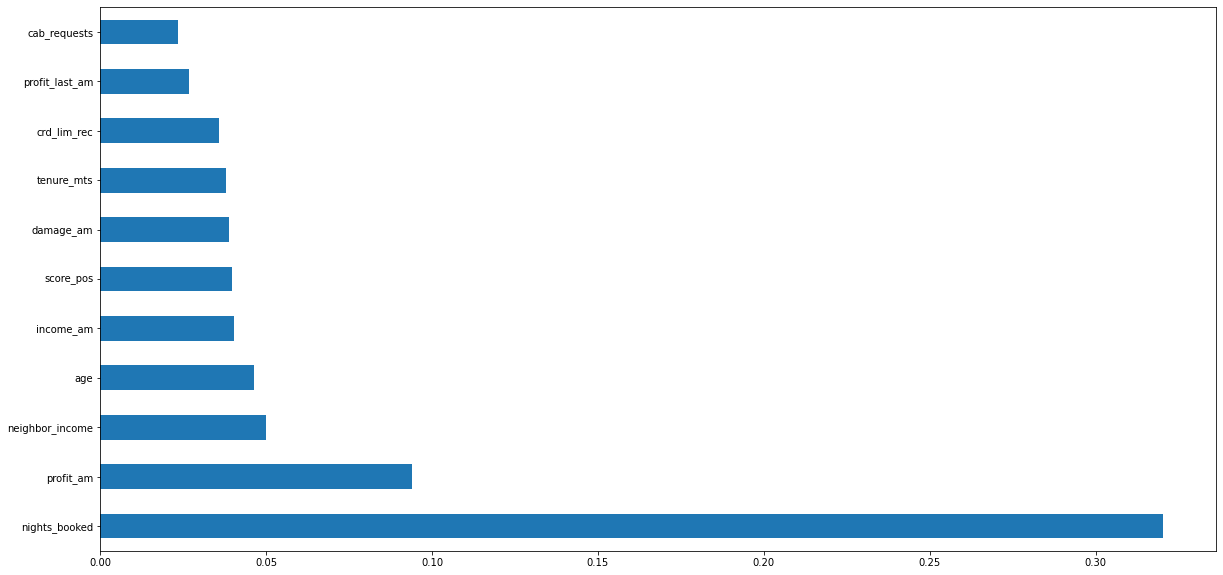

In [ ]:
'''
Plotting the feature importance to make it more readable
'''
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

feat_importances = pd.Series(profit_model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

### Feature importance
<p>We see that nights_booked, profit_am, neighbor_income, age and income_am have are the most important features. We don't know if these features have a positive or negative impact on the predictions yet. </p>

In [ ]:
'''
let's see if the features affect the outcome postively or negatively
'''
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression

pred_train =profit_model.predict(X_train_stan)

X = pd.DataFrame(X_train_stan)
X.columns = X_train.columns
predictors =  X_train.columns
y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)

reg = LinearRegression(normalize=True).fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])

for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression(normalize=True).fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
    
betas = pd.concat([names,beta],axis=1)
betas.sort_values(by=[1])

,0,1
0,retired,-0.385415
0,score_pos,-0.249033
0,age,-0.116916
0,cab_requests,-0.013062
0,crd_lim_rec,0.013132
0,score_neg,0.013202
0,nights_booked,0.014852
0,insurance_ic,0.042696
0,claims_am,0.066145
0,divorce,0.080148


We can see that people with a presidential type suite are more likely to bring in more profit since we see that the feature has a strong positive (5,3...) impact on the predictions. On the other hand it looks like retired customers are going to bring in less profit since that feature has a negative impact on the profit prediction.

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 7.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=a28085b589ec800e4aedd0baae38ad6d551b7b1210653c40d318e00449868cb5
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import random
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X_train_stan.values, mode="regression", feature_names=X_train.columns)

i = 100
X_test_stan = pd.DataFrame(X_test_stan)
X_test_stan.columns = X_train.columns

X_observation = X_test_stan.iloc[[i], :]

In [ ]:
profit_model.predict(X_observation)

array([7.02305902])

In [ ]:
explanation = explainer.explain_instance(X_observation.values[0], profit_model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

We can see that the prediction for this point is 7,02 by using different values for the different features we see that we can achieve results ranging from 6,53 to 8,45. If we take a look at the blue and orange list in the middle we can also see how this point would be affected if you where to change those features 
(ex presedential <= 0 thus not being a presidential suite would have a negative effect of 0.79 on the prediction)

# Damage classification

In [ ]:
'''
Loading the model and making a prediction on the score dataset
'''

import pickle

filename = '/content/drive/MyDrive/ML - Project sem 4/models/damage_class.sav'

damage_classifier = pickle.load(open(filename, 'rb'))
damage_calssification = damage_classifier.predict(test_log.drop('profit_prediction',axis=1))

In [ ]:
test_log['damage_ic_prediction'] = damage_calssification

## whitening the damage predictions

Which features are important?  
Because we did not use a linear svm-model we could not check the feature importance of ths model.

In [ ]:
pred_train = damage_classifier.predict(X_train_stan)

In [ ]:
'''
What is the influence of a certain feature?
'''
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(X_train_stan)
X.columns = X_train.columns
predictors =  X_train.columns
y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)

reg = LinearRegression(normalize=True).fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])
for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression(normalize=True).fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
betas = pd.concat([names,beta],axis=1)

betas.sort_values(by=[1], ascending=False)


Conclusion: bar_no, gender and cab_requests are the features that have a positive influence, probably because people under influence of alcohol cause more damage to the hotel, also men are stronger and bigger which could alse be a reason they cause more damage and when people are drunk they probably take more cabs which indirectly could have a correlation with the damage.  

For some reason shop_use and sport_ic have an influence, but we are not sure why.
Damage_inc (number of damage incidents) of course has an influence on the prediction of damage incidents.

In [ ]:
'''
Why is a prediction what it is?
'''

import lime
import lime.lime_tabular
import random
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X_train_stan.values, mode="regression", feature_names=X_train.columns)

i = 100
X_test_stan = pd.DataFrame(X_test_stan)
X_test_stan.columns = X_train.columns

X_observation = X_test_stan.iloc[[i], :]

In [ ]:
damage_classifier.predict(X_observation)

In [ ]:
explanation = explainer.explain_instance(X_observation.values[0], damage_classifier.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

Conclusion: The total amount of damages, the amount spend in the shop and the number of hotel bar visits will have a positive impact on the prediction of damage   
It is very logical that if a client has previously done damage the chance of him doing it again is higher than a person who has never done any damage.  
Also the amount of bar visits can be an indicator that the person likes to get drunk and when people are drunk they could do more damage.  

# Damage prediction

In [ ]:
'''
Loading the model and making a prediction on the score dataset
'''

import pickle

filename = '/content/drive/MyDrive/ML - Project sem 4/models/rf_gridBest.sav'

damage_model = pickle.load(open(filename, 'rb'))
damage_predictions = damage_model.predict(test_log.drop(['profit_prediction', 'damage_ic_prediction'], axis=1))

## whitening the damage predictions

In [ ]:
list(zip(X_train.columns, damage_model.feature_importances_))

In [ ]:
#check if the sum of feature importance equals 1
damage_model.feature_importances_.sum()

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

feat_importances = pd.Series(damage_model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

<p>We see that bar_no, cab_requests, age, neighbor_incomr an tenure_mts have a  big impact on the predicted damages. We don't know if it is a postive or negative impact yet. It wouldn't be a suprise if the amount of bars visited would have a strong positive impact on the amount of damage caused.</p>

In [ ]:
pred_train = damage_model.predict(X_train_stan)

In [ ]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(X_train_stan)
X.columns = X_train.columns
predictors =  X_train.columns
y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)

reg = LinearRegression(normalize=True).fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])
for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression(normalize=True).fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
betas = pd.concat([names,beta],axis=1)
betas.sort_values(by=[1])

We can cleary see that our assumption from ealrier was right, bar_no has a great impact on the damage amount. This kind of makes sense because drunk people can cause damage. Damage_inc also has an impact. This is also kind of obvious because if you caused damage once you're more likely to cause damage again. Gluten and lactose also has an impact but for this we have no logical explanation.

In [ ]:
import lime
import lime.lime_tabular
import random
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X_train_stan.values, mode="regression", feature_names=X_train.columns)

i = 100
X_test_stan = pd.DataFrame(X_test_stan)
X_test_stan.columns = X_train.columns

X_observation = X_test_stan.iloc[[i], :]

In [ ]:
damage_model.predict(X_observation)

In [ ]:
explanation = explainer.explain_instance(X_observation.values[0], profit_model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

We can see that the prediction for this point is 7,02 by using different values for the different features we see that we can achieve results ranging from 6,42 to 8,44. If we take a look at the blue and orange list in the middle we can also see how this point would be affected if you where to change those features (ex presedential <= 0 thus not being a presidential suite would have a negative effect of 0.83 on the prediction)

#Selecting the best 200 guests



### We chose to select the 200 geusts based on their true profit meaning the difference between the profit and their damages 

In [ ]:
test_log['true_profit'] = test_log['profit_prediction'] - test_log['damage_prediction']
best_guests = test_log.sort_values(by='true_profit', ascending=False).head(200)
best_guests['damage_ic_prediction'].replace([0,1],['no','yes'],inplace=True)
best_guests

In [ ]:
best_guests.to_csv('/content/drive/MyDrive/ML - Project sem 4/selected_guests.csv',index=False)